In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

#### Dataset description and EDA

Let's for now work with data for math course

In [24]:
df = df_mat
df.shape

(395, 33)

In [27]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [35]:
df.nunique().sort_values(ascending=False)

absences      34
G3            18
G2            17
G1            17
age            8
health         5
freetime       5
goout          5
Dalc           5
Walc           5
famrel         5
Fjob           5
Mjob           5
Fedu           5
Medu           5
traveltime     4
studytime      4
failures       4
reason         4
guardian       3
romantic       2
school         2
internet       2
higher         2
nursery        2
activities     2
paid           2
sex            2
schoolsup      2
Pstatus        2
famsize        2
address        2
famsup         2
dtype: int64

Actually, the only numerical attributes seem to be 'absences' and grades 'G1', 'G2', 'G3'. All other numeric data, including age, must be treated as categorical. Moreover it makes sense to think about converting absences and grades to categorical variables with several classes as they are not really continuous variables.

In [38]:
df[['age', 'absences', 'G1', 'G2', 'G3']].describe()

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924,10.415190
std,1.276043,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


Exploratory data analysis

<AxesSubplot:xlabel='G3', ylabel='Count'>

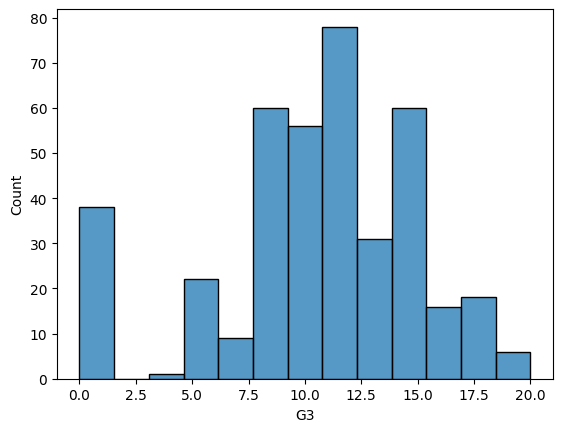

In [6]:
sns.histplot(df.G3)

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [8]:
one_hot = OneHotEncoder()

In [9]:
X = one_hot.fit_transform(df.drop('G3', axis=1))

In [10]:
y = df.G3

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y_test, y_pred, squared=False)

2.449437715753408

<AxesSubplot:xlabel='G3', ylabel='Count'>

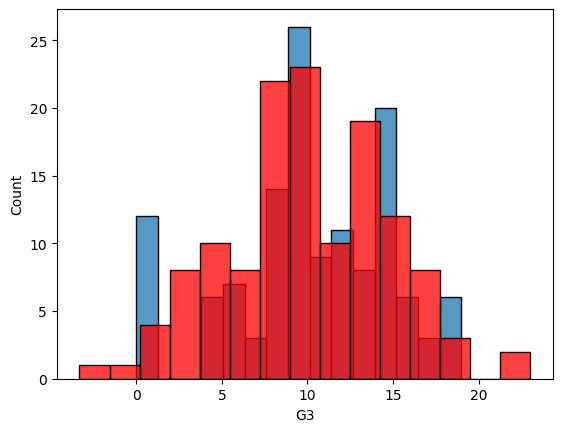

In [18]:
sns.histplot(y_test, bins=15)
sns.histplot(y_pred, color='red', bins=15, )